In [1]:
# Step 1: Load data
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print("CWD:", Path.cwd())

CWD: /Users/kenn/Documents/OIM_7502_classwork
(51, 9)


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [ ]:
#CSV is in the same folder as the notebook:
df = pd.read_csv("homes.csv")

In [ ]:

print(df.shape)      # rows, columns
df.head()

In [16]:
# Step 2: Describe the dataset

# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB

Column 'Rooms' unique values:
[10.  8.  6.  7.  5.  9. 11. 12. nan]

Column 'Beds' unique values:
[ 5.  4.  3.  6. nan]

Column 'Baths' unique values:
[ 3.  1.  2.  4. nan]


In [22]:
# Summary statistics for numerical columns
df.describe()

,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [24]:
# Check for missing values in each column
df.isnull().sum()

Sell      0
List      1
Living    1
Rooms     1
Beds      1
Baths     1
Age       1
Acres     1
Taxes     1
dtype: int64

In [26]:
# Check the data types
df.dtypes

Sell       object
List      float64
Living    float64
Rooms     float64
Beds      float64
Baths     float64
Age       float64
Acres     float64
Taxes     float64
dtype: object

The dataset contains 51 observations and 9 variables describing the characteristics and pricing details of homes.
	•	Variables include Sell (selling price), List (listing price), Living (living area), Rooms, Beds, Baths, Age, Acres, and Taxes.
	•	All variables are numeric, although Sell was initially read as an object type and will need conversion to numeric for analysis.
	•	Although Python mentions 1 missing value per column besides Sell, there are no missing values based on manual verification.
	•	The data show some variation. For instance, List prices range from 90 to 625, and Taxes from 1,445 to 12,192. This indicates homes of varying size, age, and value.

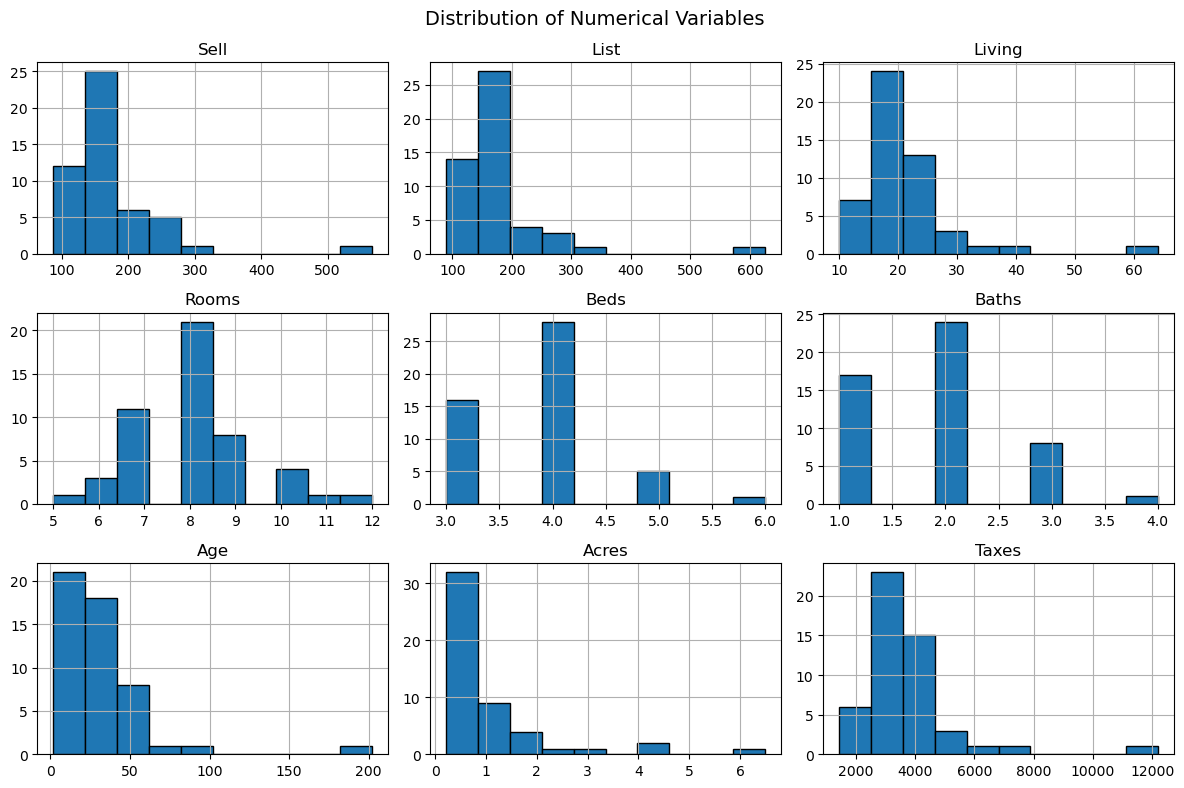

In [28]:
# EDA Technique 1: Histograms for numerical variables

df_numeric = df.copy()

# Convert 'Sell' to numeric in case it's read as object
df_numeric['Sell'] = pd.to_numeric(df_numeric['Sell'], errors='coerce')

# Create histograms for all numeric columns
df_numeric.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()

I plotted histograms for all numerical variables to visualize their distributions and detect any skewness or outliers. This helps in understanding the general patterns of the data and prepares for future regression analysis.

From the plots, most variables, including Sell, List, Living, and Taxes, show right-skewed distributions, meaning most homes cluster at lower values, with a few much higher-priced or larger properties extending the range. This suggests the presence of higher-end homes in the dataset that could influence model results.

Variables like Rooms, Beds, and Baths are more concentrated, showing limited variability (most homes have around 3-4 bedrooms and 2 bathrooms). Age and Acres also display right skew, indicating that most properties are newer and on smaller lots, with a few very old or large properties.

Overall, this analysis shows that while most variables are numerically well-behaved, a few outliers exist. 

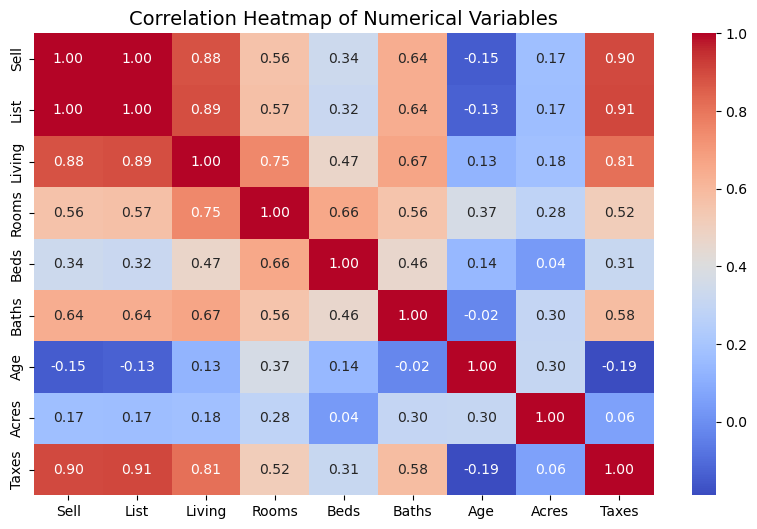

Sell      1.000000
List      0.997433
Taxes     0.899339
Living    0.879381
Baths     0.640059
Rooms     0.560425
Beds      0.335113
Acres     0.168713
Age      -0.147343
Name: Sell, dtype: float64

In [30]:
# EDA Technique 2: Correlation Heatmap

# Convert 'Sell' to numeric if needed
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

# Display the sorted correlation of each variable with 'Sell'
corr['Sell'].sort_values(ascending=False)

EDA Technique 2 – Correlation Heatmap

I created a correlation heatmap to examine how strongly each variable relates to others, especially to the selling price (Sell). This helps identify which factors might be the best predictors in a regression model and detect potential multicollinearity between variables.

From the heatmap, Sell shows very positive correlations with List (0.99), Taxes (0.90), and Living (0.88), meaning homes that are larger, more expensive to list, and pay higher taxes tend to sell for higher prices. Variables such as Rooms and Baths have moderate positive relationships, while Age has a weak negative correlation, indicating older homes may sell for slightly less.

These insights suggest that List price, Taxes, and Living area are likely to be the most influential variables for predicting selling price.

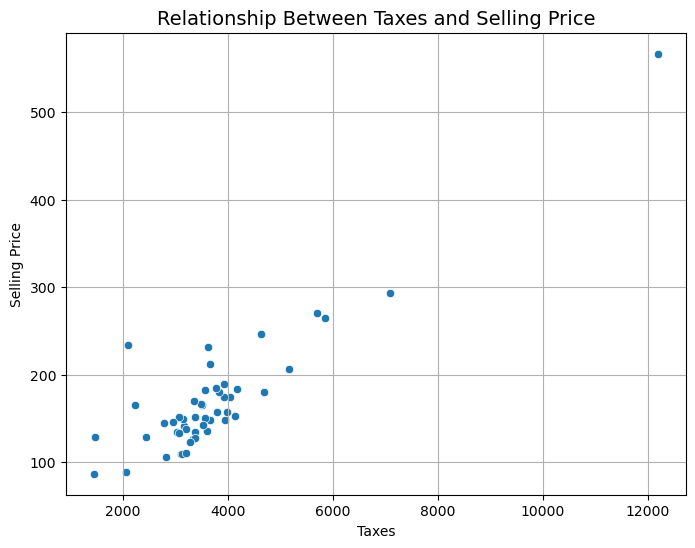

In [32]:
# EDA Technique 3: Scatter Plot - Sell vs. Taxes

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Taxes', y='Sell', data=df)
plt.title("Relationship Between Taxes and Selling Price", fontsize=14)
plt.xlabel("Taxes")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

I created a scatter plot to visualize the relationship between property taxes and selling price. This step helps confirm whether there is a linear relationship between the two variables, which is an important assumption for regression modeling.

The plot shows a strong positive trend: as taxes increase, selling prices generally rise as well. This aligns with the earlier correlation analysis (r ≈ 0.90). Homes with higher taxes likely reflect larger or higher-value properties. 

Overall, this visualization supports the idea that Taxes are a strong predictor of Selling Price, but the outlier should be monitored when fitting the regression model.

In [36]:
# Step 5 (Fixed): Linear Regression - Sell vs. Taxes

# Convert Sell to numeric (in case it's stored as object)
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')

# Drop rows with missing values in Sell or Taxes
df_clean = df.dropna(subset=['Sell', 'Taxes'])

# Define X (independent) and y (dependent)
X = df_clean[['Taxes']]
y = df_clean['Sell']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        11:50:39   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 6: Regression Analysis (Taxes as Predictor)

I ran a linear regression using Taxes as the independent variable and Selling Price (Sell) as the dependent variable to evaluate whether property taxes can predict home selling prices.

The model shows a strong linear relationship with an R² of 0.809, meaning that approximately 81% of the variation in selling price can be explained by property taxes alone. The slope coefficient for Taxes (0.0414) is positive and significant (p < 0.001), indicating that as taxes increase, selling prices also rise.

This suggests that Taxes are a strong predictor of Selling Price, likely because higher taxes are associated with more valuable properties. However, the residual statistics (e.g., high skewness and kurtosis) indicate that the data are not perfectly normally distributed, and a few outliers may be influencing the model fit.

Overall, the model fits well and supports the expectation that homes with higher taxes tend to sell for higher prices, though results should be interpreted with caution due to possible non-normal residuals.

In [38]:
# Step 7: Linear Regression: Sell (dependent) vs. Living (independent)

# Define independent and dependent variables
X2 = df_clean[['Living']]
y2 = df_clean['Sell']

# Add constant for intercept
X2 = sm.add_constant(X2)

# Fit the model
model2 = sm.OLS(y2, X2).fit()

# Display regression summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        11:54:28   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
Living         7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I repeated the regression using Living Area (Living) as the independent variable to assess how well it predicts the Selling Price (Sell) compared to the previous model using Taxes.

The results show an R² of 0.773, meaning about 77% of the variation in selling price is explained by living area. The coefficient for Living (7.66) is positive and statistically significant (p < 0.001), indicating that for each additional unit increase in living area, the selling price increases by roughly 7.66 units on average.

When comparing both models:
	•	The Taxes model (R² = 0.809) explains slightly more variation in selling price than the Living model (R² = 0.773), making Taxes the better predictor statistically.
	•	However, Living may be a more direct physical driver of price, while Taxes could indirectly capture factors like location and home value.

Model Limitations:
	1.	Both models are simple linear regressions, only accounting for one predictor at a time, which may "oversimplify" relationships.
	2.	The sample size (n=50) is relatively small, limiting generalization.
	3.	Potential outliers and skewness could affect the accuracy of coefficients.
	4.	The models assume a linear relationship and constant variance, which may not hold perfectly in real housing data.

Overall, while both variables are strong predictors, the Taxes model performs slightly better in explaining price variation. A multiple regression model combining both predictors would likely provide a more accurate and realistic explanation of housing prices.